In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [49]:
X_train_2label=data_list[0]
y_train_2label=data_list[1]
X_test_2label=data_list[2]
y_test_2label=data_list[3]
X_train_3label=data_list[4]
y_train_3label=data_list[5]
X_test_3label=data_list[6]
y_test_3label=data_list[7]

0        Good
1        Good
2        Good
3        Good
4        Good
         ... 
29240    Good
29241    Good
29242    Good
29243    Good
29244    Good
Name: Credit_Status, Length: 29245, dtype: object


In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_2label, y_train_2label)


LogisticRegression(max_iter=1000)

In [6]:
y_pred = model.predict(X_test_2label)

In [7]:
accuracy = accuracy_score(y_test_2label, y_pred)

In [8]:
report = classification_report(y_test_2label, y_pred)

c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [31]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.9753189129229063


In [32]:
print(report)

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       178
        Good       0.98      1.00      0.99      7034

    accuracy                           0.98      7212
   macro avg       0.49      0.50      0.49      7212
weighted avg       0.95      0.98      0.96      7212



Model Evaluation 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, auc, ConfusionMatrixDisplay

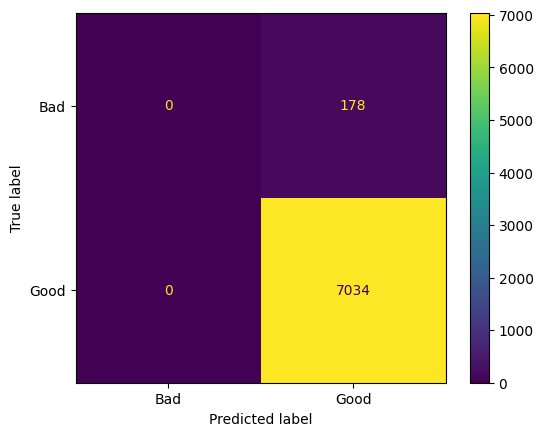

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test_2label, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good'])
cm_display.plot()
plt.show()

In [ ]:
# AUC-ROC score

lr_probs = model.predict_proba(X_test_2label)
lr_probs = lr_probs[:,1] # keeping probabilities for the positive outcome ?? probabilities that the model assigned to the examples being positive
lr_auc = roc_auc_score(y_test_2label, lr_probs)
print(f"ROC-AUC score: {round(lr_auc, 3)}")

# Model appears to be performing slightly better than random guessing

ROC-AUC score: 0.568


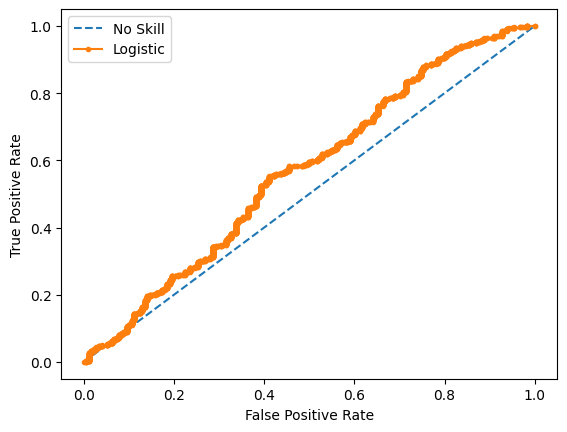

In [ ]:
# AUC-ROC Plot 

y_test_2label_binary = y_test_2label.replace(['Bad', 'Good'], [0, 1]) # label 0 for bad, label 1 for good

lr_fpr, lr_tpr, _ = roc_curve(y_test_2label_binary, lr_probs)

# to get the no skill line
ns_probs = [0 for _ in range(len(y_test_2label))]
ns_fpr, ns_tpr, _ = roc_curve(y_test_2label_binary, ns_probs)

#plotting
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = "No Skill")
plt.plot(lr_fpr, lr_tpr, marker = '.', label = "Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Precision recall score 

y_pred_binary = [0 if p == 'Bad' else 1 for p in y_pred] # label 0 for bad, label 1 for good

lr_precision, lr_recall, _ = precision_recall_curve(y_test_2label_binary, lr_probs)
lr_f1, lr_auc = f1_score(y_test_2label_binary, y_pred_binary), auc(lr_recall, lr_precision)
print(f"f1-score: {round(lr_f1, 3)}\nauc={round(lr_auc, 3)}")

f1-score: 0.988
auc=0.978


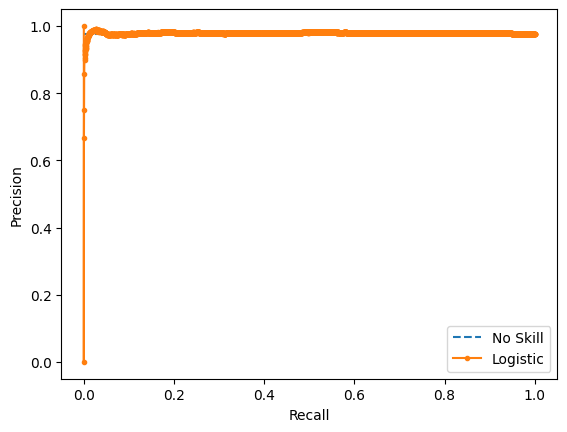

In [ ]:
# Precision- Recall curve ???????
no_skill = len(y_test_2label_binary[y_test_2label_binary==1])/len(y_test_2label_binary)
plt.plot([0,1], [no_skill, no_skill], linestyle = '--', label = 'No Skill')
plt.plot(lr_recall, lr_precision, marker = '.', label = "Logistic")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

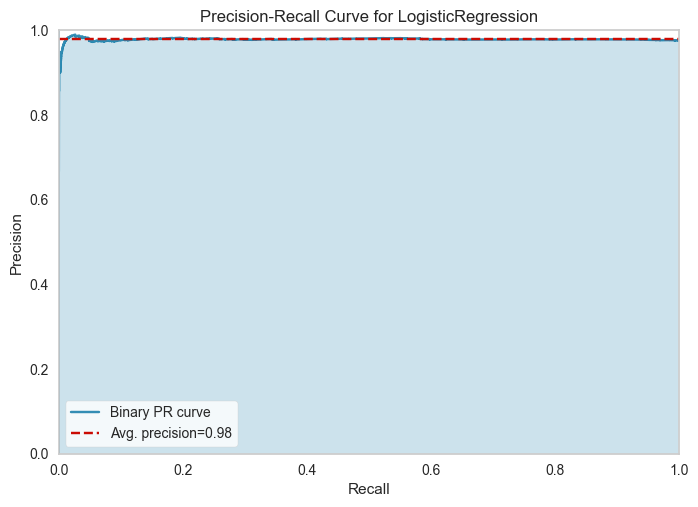

In [56]:
from yellowbrick.classifier import precision_recall_curve
y_train_2label_binary = y_train_2label.replace(['Bad', 'Good'], [0, 1])
viz = precision_recall_curve(LogisticRegression(max_iter = 1000), X_train_2label, y_train_2label_binary, X_test_2label, y_test_2label_binary)

f1-score: 0.988
auc=0.978


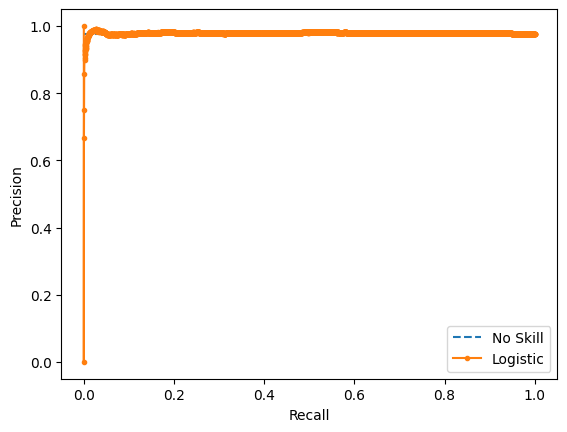

In [52]:
# y_train_2label_binary = y_train_2label.replace(['Bad', 'Good'], [0, 1])
# model2 = LogisticRegression(max_iter = 1000)
# model2.fit(X_train_2label, y_train_2label_binary)
# lr_probs2 = model.predict_proba(X_test_2label)
# lr_probs2 = lr_probs2[:, 1]
# yhat = model.predict(X_test_2label)
# lr_precision, lr_recall, _ = precision_recall_curve(y_test_2label_binary, lr_probs2)
# lr_f1, lr_auc = f1_score(y_test_2label_binary, y_pred_binary), auc(lr_recall, lr_precision)
# print(f"f1-score: {round(lr_f1, 3)}\nauc={round(lr_auc, 3)}")
# no_skill = len(y_test_2label_binary[y_test_2label_binary==1]) / len(y_test_2label_binary)
# plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# # axis labels
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# # show the legend
# plt.legend()
# # show the plot
# plt.show()